In [1]:
import pandas as pd
data=pd.read_csv('/cluster_data.csv') # 경로설정

In [2]:
X_data = data.iloc[:,:4]
y_data = data.iloc[:, -1]

In [3]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
df_data_z_scale = pd.DataFrame(StandardScaler().fit_transform(X_data), columns=X_data.columns, index = X_data.index)
df_data_z_scale

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field
0,-0.466676,-0.007607,0.318710,0.527455
1,-0.411797,0.111848,0.457787,0.695466
2,-0.256307,0.064066,0.197774,0.377130
3,-0.366065,-0.017164,0.351967,0.737911
4,-0.393504,0.068844,0.354991,0.630030
...,...,...,...,...
7207,-0.228868,1.038823,1.567379,1.340982
7208,1.728472,1.616988,0.267312,0.292240
7209,1.152246,1.148722,-0.307136,-0.982876
7210,0.960170,0.838138,-0.694133,-1.347194


In [4]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(df_data_z_scale, y_data, test_size = 0.3, random_state = 2021)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights="distance", metric="euclidean")

In [6]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [7]:
print(classifier.score(validation_data, validation_labels))

0.9537892791127541


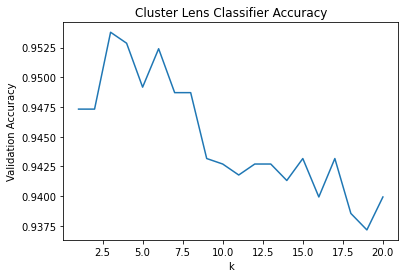

In [8]:
import matplotlib.pyplot as plt
k_list = range(1,21) # k= 1~20까지 조절
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Cluster Lens Classifier Accuracy")
plt.show()